**model that predicts crop yeilds for apples (target variable) by looking at the average temperature, rainfall and humidity (input variables or features) in different regions.**

In [292]:
#Import Numpy & PyTorch
import numpy as np
import torch

In [293]:
#Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
[91, 88, 64],
[87, 134, 58],
[102, 43, 37],
[69, 96, 70]], dtype='float32')

In [294]:
#Target (apples)
targets = np.array([[56],
[81],
[119],
[22],
[103]], dtype='float32')

In [295]:
#Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


**3.2 Linear Regression Model (from scratch)**

In [296]:
#Weights and biases
Weights = torch.randn(3, 1, requires_grad=True)
biases = torch.randn(1, requires_grad=True)
print(Weights)
print(biases)

tensor([[ 1.4348e-05],
        [-6.0313e-01],
        [ 1.5475e+00]], requires_grad=True)
tensor([0.9755], requires_grad=True)


In [264]:
#Defining the model
def model(x):
    return x @ Weights + biases

In [265]:
#Generating predictions
preds = model(inputs)
print(preds)

tensor([[-151.7654],
        [-200.3711],
        [-211.3253],
        [-168.9434],
        [-183.9923]], grad_fn=<AddBackward0>)


In [266]:
#Comparing with targets
print(targets)

tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


**3.3 Loss Function**

In [267]:
#MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [268]:
#Compute loss
loss = mse(preds, targets)
print(loss)

tensor(70054.9844, grad_fn=<DivBackward0>)


**3.4 Compute Gradients**

In [269]:
#Compute gradients
loss.backward()

In [270]:
#Gradients for weights
print(Weights)
print(Weights.grad)

tensor([[-1.1484],
        [-0.4525],
        [-0.8777]], requires_grad=True)
tensor([[-43515.4570],
        [-47482.5430],
        [-29301.9609]])


In [271]:
#Gradients for bias
print(biases)
print(biases.grad)

tensor([0.1270], requires_grad=True)
tensor([-518.9590])


In [272]:
# reset the gradients to zero before moving forward, because PyTorch accumulates gradients
Weights.grad.zero_()
biases.grad.zero_()
print(Weights.grad)
print(biases.grad)

tensor([[0.],
        [0.],
        [0.]])
tensor([0.])


**3.5 Adjust weights and biases using gradient descent**

In [273]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[-151.7654],
        [-200.3711],
        [-211.3253],
        [-168.9434],
        [-183.9923]], grad_fn=<AddBackward0>)


In [274]:
# Calculate the loss
loss = mse(preds, targets)
print(loss)

tensor(70054.9844, grad_fn=<DivBackward0>)


In [275]:
# Compute gradients
loss.backward()

In [276]:
# Adjust weights & reset gradients
with torch.no_grad():
    Weights -= Weights.grad * 1e-5
    biases -= biases.grad * 1e-5
    Weights.grad.zero_()
    biases.grad.zero_()

In [277]:
print(Weights)

tensor([[-0.7133],
        [ 0.0223],
        [-0.5847]], requires_grad=True)


In [278]:
# With the new weights and biases, the model should have a lower loss.

# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(28951.2539, grad_fn=<DivBackward0>)


**3.6 Train for multiple epochs**

In [279]:
# Train for 1000 epochs
for i in range(1000):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        Weights -= Weights.grad * 1e-5
        biases -= biases.grad * 1e-5
        Weights.grad.zero_()
        biases.grad.zero_()

In [280]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(2.3786, grad_fn=<DivBackward0>)


In [281]:
# Print predictions
preds

tensor([[ 57.2880],
        [ 81.3591],
        [120.4241],
        [ 21.5646],
        [100.1915]], grad_fn=<AddBackward0>)

In [282]:
# Print targets
targets

tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])

# **1.1 Linear Regression Model using PyTorch built-ins**

In [283]:
# Import Numpy & PyTorch
import numpy as np
import torch

In [284]:
# Imports
import torch.nn as nn

In [285]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37],[69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58],
                   [102, 43, 37], [69,96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96,70]], dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119],[56, 70], [81, 101], [119, 133], [22, 37],
                    [103, 119],[56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')

In [286]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

**1.1.1 Dataset and DataLoader**

In [287]:
# Import tensor dataset & data loader
from torch.utils.data import TensorDataset, DataLoader

In [288]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [289]:
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[ 87., 134.,  58.],
         [ 69.,  96.,  70.],
         [102.,  43.,  37.],
         [ 91.,  88.,  64.],
         [ 73.,  67.,  43.]]), tensor([[119., 133.],
         [103., 119.],
         [ 22.,  37.],
         [ 81., 101.],
         [ 56.,  70.]])]

In [290]:
# Instead of initializing the weights & biases manually, we can define the model using nn.Linear.

# Define model
model = nn.Linear(3, 2)

In [291]:
#Obtain Parameters
print(model.weight)
print()
print(model.bias)

Parameter containing:
tensor([[-0.3855,  0.0090,  0.4108],
        [-0.0088, -0.1764, -0.1758]], requires_grad=True)

Parameter containing:
tensor([ 0.4895, -0.4521], requires_grad=True)


**1.1.3 Optimizer**

In [297]:
# Instead of manually manipulating the weights & biases using gradients, we can use the optimizer optim.SGD.

# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

**1.1.4 Loss Function**

In [298]:
# Instead of defining a loss function manually, we can use the built-in loss function mse_loss.

# Import nn.functional
import torch.nn.functional as F

In [299]:
# Define loss function
loss_fn = F.mse_loss

In [300]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(10082.2842, grad_fn=<MseLossBackward0>)


<ipython-input-300-9e549bc4b76a>:1: UserWarning: Using a target size (torch.Size([5, 1])) that is different to the input size (torch.Size([5, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = loss_fn(model(inputs), targets)


**1.1.5 Train the model**

In [301]:
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
    print('Training loss: ', loss_fn(model(inputs), targets))

In [302]:
# Train the model for 100 epochs
fit(1000, model, loss_fn, opt)

Training loss:  tensor(3341.8445, grad_fn=<MseLossBackward0>)


<ipython-input-301-215f1d92ed09>:11: UserWarning: Using a target size (torch.Size([5, 1])) that is different to the input size (torch.Size([5, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  print('Training loss: ', loss_fn(model(inputs), targets))


In [303]:
#Obtain Parameters
print(model.weight)
print()
print(model.bias)

Parameter containing:
tensor([[-0.2232,  0.1994,  0.5246],
        [ 0.2139,  0.0884, -0.0159]], requires_grad=True)

Parameter containing:
tensor([ 0.4914, -0.4494], requires_grad=True)


In [304]:
# Generate predictions
preds = model(inputs)
preds

tensor([[20.1205, 20.4007],
        [31.3082, 25.7721],
        [38.2279, 29.0766],
        [ 5.7146, 24.5787],
        [40.9609, 21.6776]], grad_fn=<AddmmBackward0>)

In [305]:
# Compare with targets
targets

tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])

# **Exercise 1:**

**Try Linear Regression just using numpy (Without Tensorflow/Pytorch or other torch library). You can optionally use sklearn (if you want).**

**Prediction of house prices using multivariate linear regression**

In [306]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [307]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [308]:
# Read the house data into a data frame
df = pd.read_csv('/content/drive/MyDrive/SEM-6/ML/Lab-4/kc_house_data.csv')

In [309]:
# Display the first ten observations
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [310]:
# Describe the dataset
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [311]:
# We can see that each entry has an id, i.e. an identification number, as well as a date, i.e. the date on which the transaction took place. 
# These two columns are irrelevant to our analysis; so we will go ahead and remove them.

# Drop the id and date columns
df = df.drop(['id', 'date'], axis=1)

In [312]:
# Display the number of data observations
len(df)

21613

In [313]:
# Display the number of starting features
len(df.columns)

19

In [314]:
# Check the types of data
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [315]:
# Display the number of null data observations
df.isnull().values.sum()

0

**Feature selection**

In [316]:
# Specify target and features
target = df.iloc[:, 0].name
features = df.iloc[:, 1:].columns.tolist()
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [317]:
# Correlations of features with target variable
correlations = df.corr()
correlations['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [318]:
# Correlations with target variable
cor_target = abs(correlations['price'])

# Display features with correlation < 0.2
removed_features = cor_target[cor_target < 0.2]
removed_features

sqft_lot        0.089661
condition       0.036362
yr_built        0.054012
yr_renovated    0.126434
zipcode         0.053203
long            0.021626
sqft_lot15      0.082447
Name: price, dtype: float64

In [319]:
# Remove features with correlation < 0.2
df = df.drop(['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long',
              'sqft_lot15'], axis=1)

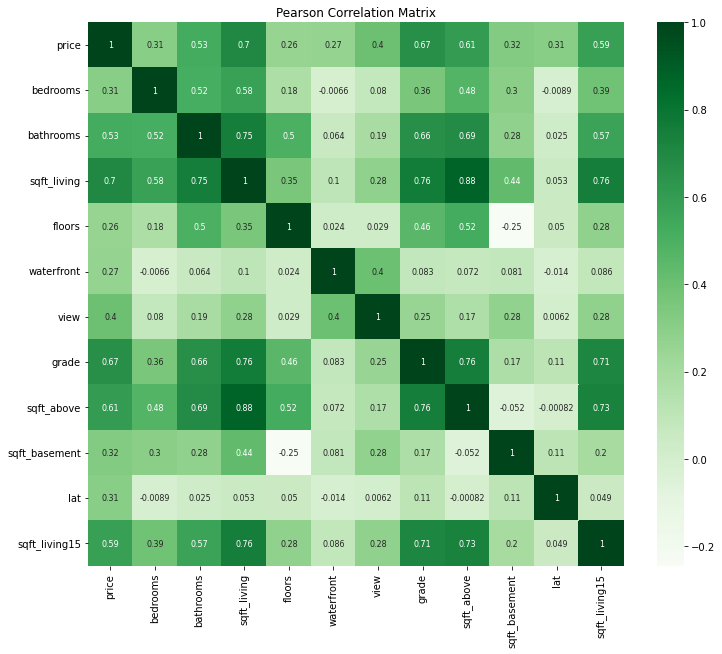

In [320]:
# we also have to ensure that the remaining features are not very highly correlated with each other, i.e. that they are -more or less- independent variables. 
# Let us plot the Pearson correlation matrix using Matplotlib and Seaborn.

# Plot Pearson correlation matrix
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

In [321]:
# Determine the highest intercorrelations
highly_correlated_features = new_correlations[new_correlations > 0.75]
highly_correlated_features.fillna('-')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.0,-,-,-,-,-,-,-,-,-,-,-
bedrooms,-,1.0,-,-,-,-,-,-,-,-,-,-
bathrooms,-,-,1.0,0.754665,-,-,-,-,-,-,-,-
sqft_living,-,-,0.754665,1.0,-,-,-,0.762704,0.876597,-,-,0.75642
floors,-,-,-,-,1.0,-,-,-,-,-,-,-
waterfront,-,-,-,-,-,1.0,-,-,-,-,-,-
view,-,-,-,-,-,-,1.0,-,-,-,-,-
grade,-,-,-,0.762704,-,-,-,1.0,0.755923,-,-,-
sqft_above,-,-,-,0.876597,-,-,-,0.755923,1.0,-,-,-
sqft_basement,-,-,-,-,-,-,-,-,-,1.0,-,-


In [322]:
# Remove features which are highly correlated with "sqft_living"
df = df.drop(['sqft_above', 'sqft_living15'], axis=1)

In [323]:
# Update features and store their length
features = df.iloc[:, 1:].columns.tolist()
len_of_features = len(features)
len_of_features

9

**Multivariate linear regression**

In [324]:
# Normalize the features
df.iloc[:, 1:] = (df - df.mean())/df.std()

In [325]:
# Create X, y and theta
X = df.iloc[:, 1:]
ones = np.ones([len(df), 1])
X = np.concatenate((ones, X), axis=1)
y = df.iloc[:, 0:1].values
theta = np.zeros([1, len_of_features + 1])

In [326]:
# Store target
target = y

# Display the size of the matrices
X.shape, y.shape, theta.shape

((21613, 10), (21613, 1), (1, 10))

In [327]:
# Define computecost function
def computecost(X, y, theta):
    H = X @ theta.T
    J = np.power((H - y), 2)
    sum = np.sum(J)/(2 * len(X))
    return sum

In [328]:
# Set iterations and alpha (learning rate)
alpha = 0.01
iterations = 10000

In [329]:
# Define gradientdescent function
def gradientdescent(X, y, theta, iterations, alpha):
    cost = np.zeros(iterations)
    for i in range(iterations):
        H = X @ theta.T
        theta = theta - (alpha/len(X)) * np.sum(X * (H - y), axis=0)
        cost[i] = computecost(X, y, theta)
    return theta, cost

In [330]:
# Do Gradient Descent and display final theta
final_theta, cost = gradientdescent(X, y, theta, iterations, alpha)
final_theta.round(2)

array([[ 5.4008814e+05,  3.6712719e+05, -0.0000000e+00, -0.0000000e+00,
         2.0000000e-02, -0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        -1.0000000e-02, -0.0000000e+00]])

In [331]:
# Compute and display final cost
final_cost = computecost(X, y, final_theta)
final_cost.round(2)

0.0

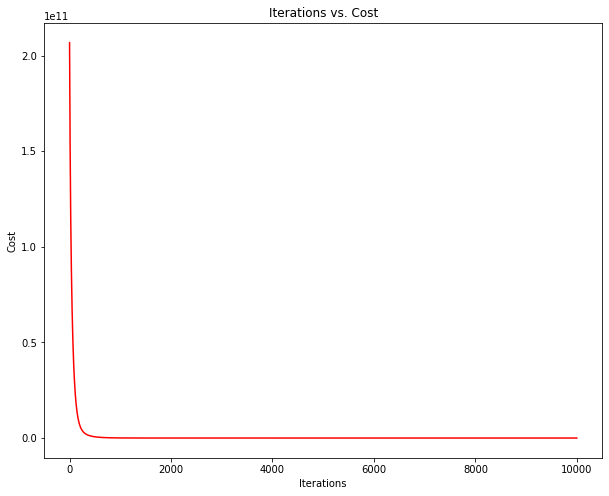

In [332]:
# In order to check whether our algorithm converges, we will plot the Iterations vs. Cost figure.

# Plot Iterations vs. Cost figure
fig_2, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.arange(iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Iterations vs. Cost')
plt.show()

In [333]:
# Define rmse function
def rmse(target, final_theta):
    predictions = X @ final_theta.T
    return np.sqrt(((predictions[:, 0] - target[:, 0]) ** 2).mean())

# Compute and display Root Mean Squared Error
rmse_val = rmse(target, final_theta)
rmse_val.round(2)

0.01

In [334]:
# Display sample prediction for first observation
predictions = X @ final_theta.T
str(predictions[0].round(2))

'[221900.]'